# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
both_data = mouse_metadata.merge(study_results)

# Display the data table for preview
both_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mice = mouse_metadata['Mouse ID'].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = both_data.loc[both_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_df = both_data.loc[both_data["Mouse ID"]=='g989']
dup_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df = both_data.drop(both_data['Mouse ID']=='g989', inplace =False)
#renamed mouse ID field to make this command work
both_data = both_data.rename(columns={"Mouse ID": "Mouse_ID"})
both_data = both_data[both_data.Mouse_ID != "g989"]
both_data


,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = both_data['Mouse_ID'].nunique()
num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#I'm building this two different ways. I wanted to practice both
# mean = both_data['Tumor Volume (mm3)'].groupby(both_data['Drug Regimen']).mean()
# median = both_data['Tumor Volume (mm3)'].groupby(both_data['Drug Regimen']).median()
# variance = both_data['Tumor Volume (mm3)'].groupby(both_data['Drug Regimen']).var()
# stdev = both_data['Tumor Volume (mm3)'].groupby(both_data['Drug Regimen']).std()
# sterr = both_data['Tumor Volume (mm3)'].groupby(both_data['Drug Regimen']).sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_df = both_data.groupby("Drug Regimen").mean()
median_df = both_data.groupby("Drug Regimen").median()
variance_df = both_data.groupby("Drug Regimen").var()
st_df = both_data.groupby("Drug Regimen").std() 
sem_df = both_data.groupby("Drug Regimen").sem()
#I'm building this two different ways. I wanted to practice both
# Assemble the resulting series into a single summary DataFrame.
summ_df = pd.DataFrame({"Avg tumor volumn": mean_df["Tumor Volume (mm3)"],
                        "Median tumor volumn": median_df["Tumor Volume (mm3)"],
                        "Variance of tumor volumn": variance_df["Tumor Volume (mm3)"],
                        "Standard Deviation of tumor volumn": st_df["Tumor Volume (mm3)"],
                        "Standard Error of tumor volumn": sem_df["Tumor Volume (mm3)"]})
summ_df

C:\Users\David\AppData\Local\Temp\ipykernel_7988\770509640.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = both_data.groupby("Drug Regimen").mean()
C:\Users\David\AppData\Local\Temp\ipykernel_7988\770509640.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_df = both_data.groupby("Drug Regimen").median()
C:\Users\David\AppData\Local\Temp\ipykernel_7988\770509640.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be vali

,Avg tumor volumn,Median tumor volumn,Variance of tumor volumn,Standard Deviation of tumor volumn,Standard Error of tumor volumn
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

aggreg_df = both_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var' , 'std','sem'])
#rounding for readability
aggreg_df = aggreg_df.round(4)
# Using the aggregation method, produce the same summary statistics in a single line
aggreg_df

Tumor Volume (mm3)                                  
                           mean   median      var     std     sem
Drug Regimen                                                     
Capomulin               40.6757  41.5578  24.9478  4.9948  0.3293
Ceftamin                52.5912  51.7762  39.2902  6.2682  0.4698
Infubinol               52.8848  51.8206  43.1287  6.5672  0.4922
Ketapril                55.2356  53.6987  68.5536  8.2797  0.6039
Naftisol                54.3316  52.5093  66.1735  8.1347  0.5965
Placebo                 54.0336  52.2889  61.1681  7.8210  0.5813
Propriva                52.3209  50.4463  43.8520  6.6221  0.5443
Ramicane                40.2167  40.6732  23.4867  4.8463  0.3210
Stelasyn                54.2331  52.4317  59.4506  7.7104  0.5731
Zoniferol               53.2365  51.8185  48.5334  6.9666  0.5164

## Bar and Pie Charts

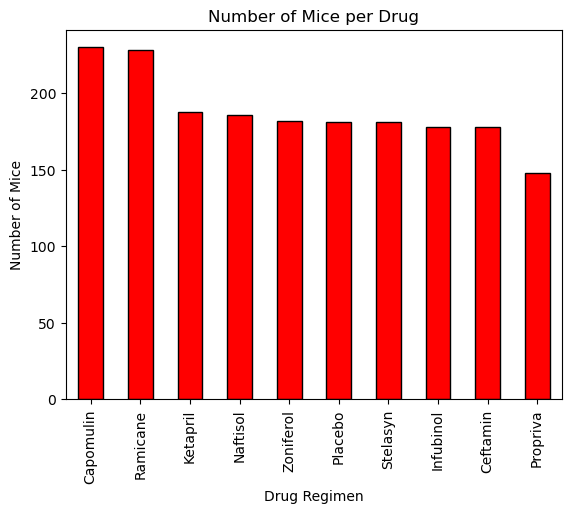

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts_df = both_data["Drug Regimen"].value_counts()
counts_df2 = pd.DataFrame(counts_df).reset_index()
counts_df2 = counts_df2.rename(columns={"index":"Drug","Drug Regimen":"# Mice"})
#making a list of drugs below in case I need them
# drugs = ["Capomulin", "Ceftamin", "Infubinol","Ketapril", "Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
mice_per_drug = counts_df.plot(kind ="bar", xlabel="Drug Regimen", ylabel ="Number of Mice", title="Number of Mice per Drug", color ="r", edgecolor="black")




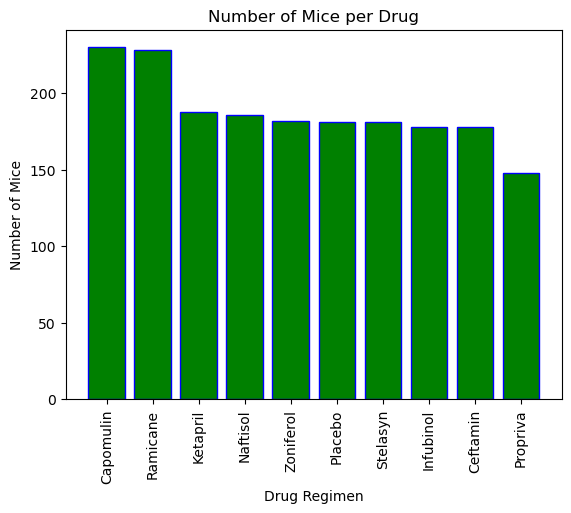

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts_df2["Drug"],counts_df2["# Mice"],edgecolor='blue',color="Green")
plt.xticks(rotation=90)
plt.title("Number of Mice per Drug")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.show()

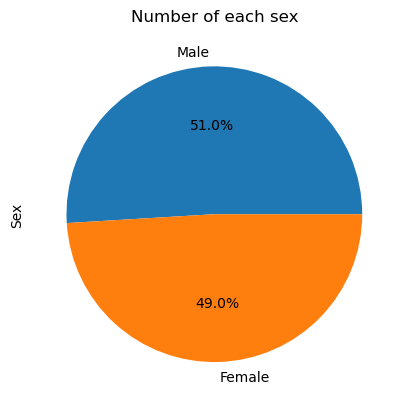

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = both_data["Sex"].value_counts()
sex_chart =sex.plot(kind='pie',autopct= "%1.1f%%", title="Number of each sex")
#we can add a legend if we want
# plt.legend(loc="center left",bbox_to_anchor=(1.0, 0.5))


Text(0.5, 1.0, 'Number of each sex')

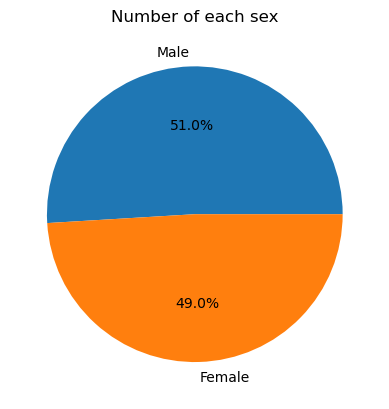

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
plt.pie(sex,labels=labels,autopct= "%1.1f%%")
plt.title("Number of each sex")
#we can add a legend if we want
# plt.legend()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#finding the final timpoint below. Final timpoint = 45
max1 = both_data["Timepoint"].max()
desired_drugs = ["Capomulin", "Ramicane","Infubinol","Ceftamin"]

final_point_df = both_data[(both_data["Timepoint"]==45) &((both_data["Drug Regimen"]=="Capomulin") | (both_data["Drug Regimen"]=="Ramicane")|(both_data["Drug Regimen"]=="Infubinol") |(both_data["Drug Regimen"]=="Ceftamin")  )]
final_point_df
      
                         
# Start by getting the last (greatest) timepoint for each mouse

last_size = final_point_df['Tumor Volume (mm3)']


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = final_point_df.merge(both_data, how = "inner")

#creating seperate data frames for each drug. Might be useful for plotting.
capomulin_df = merged_df.loc[merged_df['Drug Regimen']=="Capomulin"]
ramicane_df = merged_df.loc[merged_df['Drug Regimen']=="Ramicane"]
infubinol_df = merged_df.loc[merged_df['Drug Regimen']=="Infubinol"]
ceftamin_df = merged_df.loc[merged_df['Drug Regimen']=="Ceftamin"]

merged_df

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
58,x822,Ceftamin,Male,3,29,45,61.386660,3
59,y163,Infubinol,Female,17,27,45,67.685569,3
60,y769,Ceftamin,Female,6,27,45,68.594745,4
61,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane","Infubinol","Ceftamin"]
Capomulin_count = 0
Ramicane_count = 0
Infubinol_count = 0
Ceftamin_count = 0
total_treatments =0

for index, row in merged_df.iterrows():
    if row['Drug Regimen'] =="Capomulin":
        Capomulin_count +=1
        total_treatments +=1
    elif row['Drug Regimen'] =="Ramicane":
        Ramicane_count +=1
        total_treatments +=1
    elif row['Drug Regimen'] =="Infubinol":
        Infubinol_count +=1
        total_treatments +=1
    elif row['Drug Regimen'] =="Ceftamin":
        Ceftamin_count +=1
        total_treatments +=1
print(Capomulin_count, Ramicane_count,Infubinol_count,Ceftamin_count,total_treatments)
    

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Capomulin IQR info
capomulin_tumor = capomulin_df['Tumor Volume (mm3)']
quartiles1 = capomulin_tumor.quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
upper_outlier1 = upperq1 + (1.5*iqr1)
lower_outlier1 = lowerq1 - (1.5*iqr1)
sem1 = capomulin_tumor.sem()


# print(f"The quartiles for Capomulin are:\nLower Quartile: {round(lowerq1,3)}.\nUpper Quartile: {round(upperq1,3)}. \nInterquartile Qange: {round(iqr1,3)}.\nPotential Outliers: {round(upper_outlier1,3)}, {round(lower_outlier1,3)}.")

#Ramicane IQR info
ramicane_tumor = ramicane_df['Tumor Volume (mm3)']
quartiles2 = ramicane_tumor.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2
upper_outlier2 = upperq2 + (1.5*iqr2)
lower_outlier2 = lowerq2 - (1.5*iqr2)
sem2 = ramicane_tumor.sem()
# print(f"The quartiles for Ramicane are:\nLower Quartile: {round(lowerq2,3)}.\nUpper Quartile: {round(upperq2,3)}. \nInterquartile Qange: {round(iqr2,3)}.\nPotential Outliers: {round(upper_outlier2,3)}, {round(lower_outlier2,3)}.")

#Infubinol IQR info
infubinol_tumor = infubinol_df['Tumor Volume (mm3)']
quartiles3 = infubinol_tumor.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3
upper_outlier3 = upperq3 + (1.5*iqr3)
lower_outlier3 = lowerq3 - (1.5*iqr3)
sem3 = infubinol_tumor.sem()
# print(f"The quartiles for Infubinol are:\nLower Quartile: {round(lowerq3,3)}.\nUpper Quartile: {round(upperq3,3)}. \nInterquartile Qange: {round(iqr3,3)}.\nPotential Outliers: {round(upper_outlier3,3)}, {round(lower_outlier3,3)}.")

#Ceftamin IQR info
ceftamin_tumor = ceftamin_df['Tumor Volume (mm3)']
quartiles4 = ceftamin_tumor.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4
upper_outlier4 = upperq4 + (1.5*iqr4)
lower_outlier4 = lowerq4 - (1.5*iqr4)
sem4 = ceftamin_tumor.sem()
# print(f"The quartiles for ceftamin_df are:\nLower Quartile: {round(lowerq4,3)}.\nUpper Quartile: {round(upperq4,3)}. \nInterquartile Qange: {round(iqr4,3)}.\nPotential Outliers: Values above {round(upper_outlier4,3)}, Values below {round(lower_outlier4,3)}.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds (listed above-can print if needed)


21 20 9 13 63


<function matplotlib.pyplot.show(close=None, block=None)>

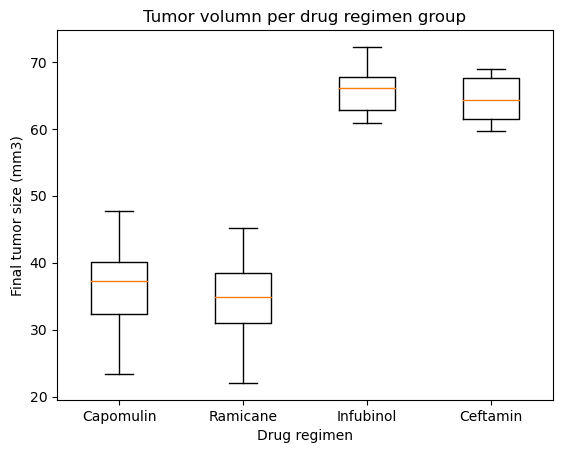

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

treatment_group_data = [capomulin_tumor,ramicane_tumor,infubinol_tumor,ceftamin_tumor]
plt.boxplot(treatment_group_data, labels=treatments)
plt.title("Tumor volumn per drug regimen group")
plt.ylabel("Final tumor size (mm3)")
plt.xlabel("Drug regimen")
plt.show

## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse tumor size on Capomulin')

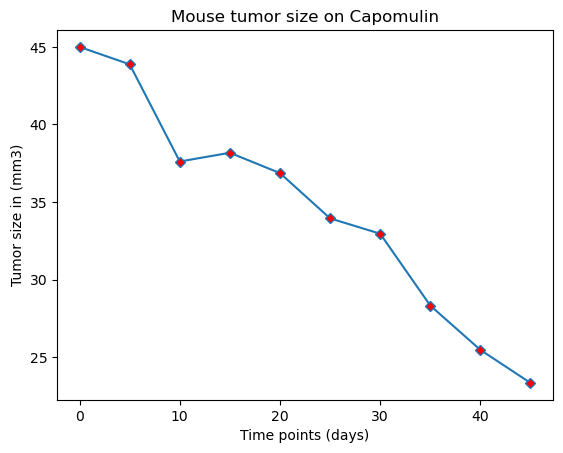

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_plot = both_data[(both_data['Drug Regimen']=="Capomulin") & (both_data['Mouse_ID']=='s185')]
Capomulin_plot
x1 = Capomulin_plot["Timepoint"]
y1 = Capomulin_plot["Tumor Volume (mm3)"]
plt.plot(x1,y1,markersize=5,marker="D",markerfacecolor='red')
plt.ylabel("Tumor size in (mm3)")
plt.xlabel("Time points (days)")
plt.title("Mouse tumor size on Capomulin")


Text(0.5, 0, 'Mouse weight (g)')

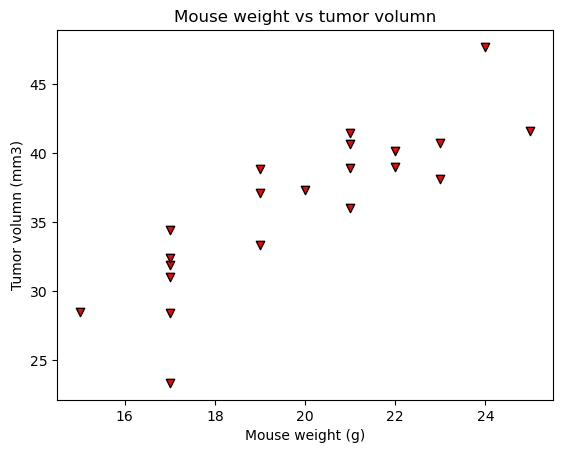

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight = capomulin_df["Weight (g)"]
volumn = capomulin_df["Tumor Volume (mm3)"]
plt.scatter(weight,volumn, color="red", marker= "v",edgecolor='black')
plt.title("Mouse weight vs tumor volumn")
plt.ylabel("Tumor volumn (mm3)")
plt.xlabel("Mouse weight (g)")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_cap = st.pearsonr(weight,volumn)
print(f"The correlation is: {correlation_cap}")


The correlation is: PearsonRResult(statistic=0.8490719078173734, pvalue=1.1339296616720512e-06)


In [19]:
#calculating regression line y=mx+b
slope, intercept, r, p, std_err = st.linregress(weight,volumn)

line_reg = (slope * weight) + intercept



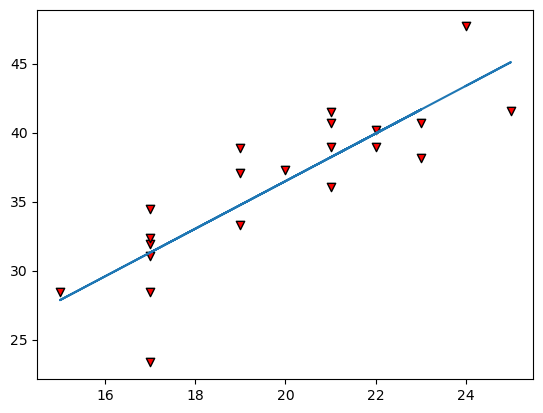

In [21]:
#graphing scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen and linear regression line
plt.scatter(weight,volumn, color="red", marker= "v",edgecolor='black')
plt.plot(weight,line_reg)